# Eleventh Session of Stochastic Modelling

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guglielmopadula/StochasticModelling2022-2023/blob/main/EleventhSession.ipynb)

## A very fast recap on the Euler Maruyama algorithm

In the previous lab we saw that $$W_{t}=\lim\limits_{n\rightarrow+\infty}\sum\limits _{i=1}^{n}\xi_{i}^{n}:=\int\limits_{0}^{t} dW$$
where $$\xi_{i}^{n}\sim Normal(0,\frac{t}{n})$$
Simulating form $W_{t}$ was particularly fast because of the indipendence of increments property.
Let's now study more general SDE
$$dX=a(X,t)dt+b(X,t)dW$$

- recursively define $Y_n$ for $0 \leq n \leq N-1$ by
$$
Y_{n+1}=Y_n+a\left(Y_n, \tau_n\right) \Delta t+b\left(Y_n, \tau_n\right) \Delta W_n
$$
Notice that the indipendence of increments property does not hold anymore, so we can't vectorize the code anymore.

## Exercise 
1) Write the code of the Euler Maruyama method, in a way it works also vectorized with $m$ samples.
2) Write a function that takes the number of samples $m$ and the number of discretization points $N=10000$ and return $m=1000$ samples on of the 2D parametrized stochastic differential equation $$dX=\begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}Xdt+\sigma dW$$ with $\sigma=0,2,3$, starting from $X_{0}=1$ with $t_{0}=1$ to $t_{f}=10$. Plot the mean of the samples.
3) Write a function that takes the number of samples $m$ and the number of discretization points $N=10000$ and return $m=1000$ samples on of the 1D parametrized stochastic differential equation $$dX=-Xdt+\sigma (2+sin(X)) dW$$ with $\sigma=0,0.01,0.05$,starting from $X_{0}=1$ with $t_{0}=1$ to $t_{f}=10$. Plot the mean of the samples.


# Exercise 1

In [5]:
import numpy as np
def euler_maruyama(a,b,x0,t0,tf,n,m):
    t=tf-t0
    tpoints=np.linspace(0,t,n)
    deltat=tpoints[1]-tpoints[0]
    x=np.zeros((n,x0.reshape(-1).shape[0],m))
    x[0]=np.tile(x0.reshape(1,x0.shape[0],1),(1,1,m))
    for i in range(1,n):
        x[i]=x[i-1]+a(x[i-1],tpoints[i-1])*deltat+b(x[i-1],tpoints[i-1])*np.random.randn(*x[0].shape)*np.sqrt(deltat)
    return tpoints,x


a=lambda x,t:-x
b=lambda x,t: 0

# Exercise 2

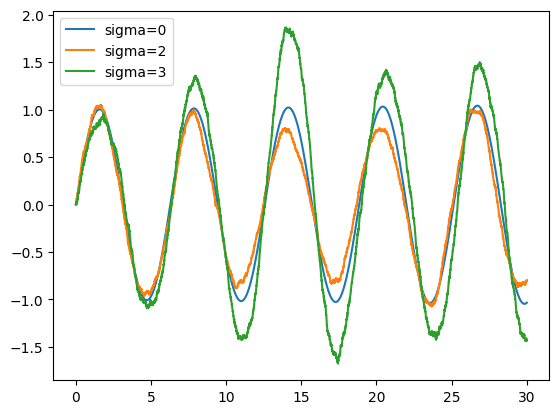

In [7]:
def exercise2sde(sigma):
    A=np.array([[0,1],[-1,0]])
    a=lambda x,t:A@x
    b=lambda x,t: sigma*np.ones(x.shape)
    x0=np.array([0,1])
    t0=0
    tf=30
    n=10000
    m=1000
    t,x=euler_maruyama(a,b,x0,t0,tf,n,m)
    x=x.reshape(n,2,m)# Exercise 1
    return t,np.mean(x,axis=-1)

import matplotlib.pyplot as plt
from tqdm import trange
t,x=exercise2sde(0)
plt.plot(t,x[:,0],label="sigma=0")
t,x=exercise2sde(2)
plt.plot(t,x[:,0],label="sigma=2")
t,x=exercise2sde(3)
plt.plot(t,x[:,0],label="sigma=3")
plt.legend()

# Exercise 3

In [8]:
def exercise3sde(sigma):
    a=lambda x,t:-x
    b=lambda x,t: sigma*(2+np.sin(x))
    x0=np.array([1])
    t0=0
    tf=1
    n=10000
    m=1000
    t,x=euler_maruyama(a,b,x0,t0,tf,n,m)
    x=x.reshape(n,m)
    return t,np.mean(x,axis=1)

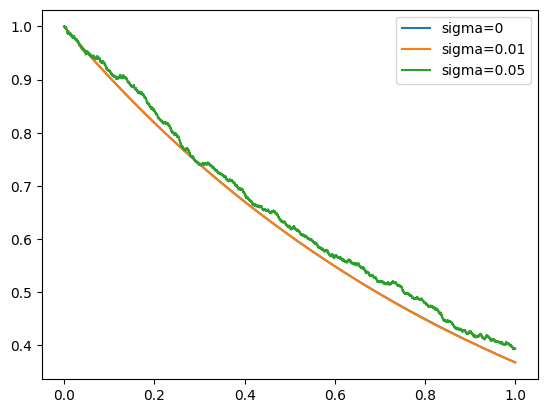

In [11]:
import matplotlib.pyplot as plt
from tqdm import trange
t,x=exercise3sde(0)
plt.plot(t,x,label="sigma=0")
t,x=exercise3sde(0.01)
plt.plot(t,x,label="sigma=0.01")
t,x=exercise3sde(0.5)
plt.plot(t,x,label="sigma=0.05")
plt.legend()